In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, buto they won't be saved outside of the current session

/kaggle/input/niazi-coffe-shop-sale/Coffee Shop Sales.xlsx


## 1. Introducci√≥n: 

En la industria del caf√©, entender el comportamiento de compra de los clientes es clave para optimizar operaciones, maximizar ingresos y mejorar la experiencia del consumidor. Este an√°lisis busca transformar datos de transacciones en insights accionables que puedan ayudar a la toma de decisiones estrat√©gicas en un coffee shop con m√∫ltiples sucursales.

A trav√©s del uso de herramientas de an√°lisis de datos en Python, exploraremos tendencias y patrones en las ventas para responder preguntas clave como:

- ¬øCu√°les son las horas pico de ventas y c√≥mo pueden optimizarse los recursos en esos momentos?
- ¬øQu√© categor√≠as de productos generan m√°s ingresos y cu√°les tienen menor rotaci√≥n?
- ¬øExisten diferencias significativas en el desempe√±o de las distintas sucursales?
- ¬øC√≥mo var√≠an las ventas a lo largo del mes y del a√±o? ¬øSe pueden anticipar per√≠odos de mayor demanda?
- ¬øExiste una relaci√≥n entre el precio y la cantidad vendida de los productos?

Realizaremos un an√°lisis exploratorio de los datos (EDA), complementado con visualizaciones que nos permitir√°n extraer conclusiones clave para la optimizaci√≥n de la operaci√≥n del coffee shop.



## 2. Importaci√≥n de librer√≠as y carga de datos:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos y mostrar primeras filas
df = pd.read_excel('/kaggle/input/niazi-coffe-shop-sale/Coffee Shop Sales.xlsx')
df.head()


transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

## 3. Exploraci√≥n inicial de los datos:¬∂
Procederemos a ver:

- cantidad de filas y columnas
- tipo de datos
- buscar nulos y duplicados

In [3]:
# informaci√≥n sobre el n√∫mero de filas y columnas
df.shape

(149116, 11)

In [4]:
# buscamos nulos
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
# informacion mas detallada

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
# nro de duplicados

df.duplicated().sum()

0

In [7]:
# creamos columnas de year, month, day y transaction_time para facilitar el an√°lisis

df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month
df["day"] = df["transaction_date"].dt.day
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour
df.head()

transaction_id transaction_date  transaction_time  transaction_qty  \
0               1       2023-01-01                 7                2   
1               2       2023-01-01                 7                2   
2               3       2023-01-01                 7                2   
3               4       2023-01-01                 7                1   
4               5       2023-01-01                 7                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  year  month  day  
0  Gourmet brewed coffee                  Ethiopia Rg  2023      1    1  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  2023      1    1  
2          Hot chocolate            Dark chocolate Lg  2023      1    1  
3            Drip coffee  Our Old Time Diner Blend Sm  2023      1    1  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg  2023      1    1

## 4. An√°lisis y visualizaci√≥n de los datos:

### Cantidad de transacciones por hora del d√≠a

Buscamos evaluar cuales son las horas pico del negocio y como se distribuyen las ventas a trav√©s del d√≠a.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


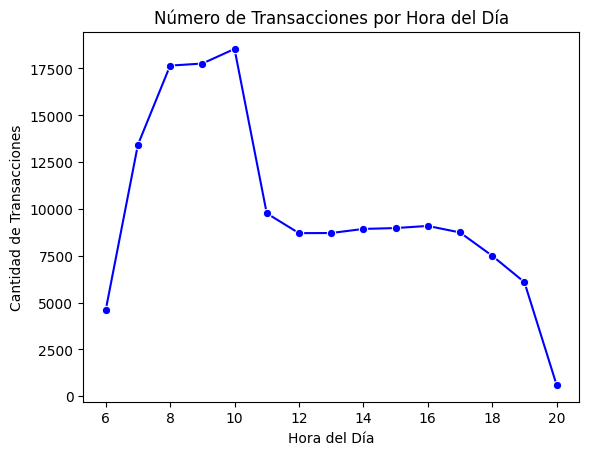

In [8]:
# Agrupar por hora y contar transacciones
hourly_sales = df.groupby("transaction_time")["transaction_id"].count().reset_index()

# Graficar
sns.lineplot(x="transaction_time", y="transaction_id", data=hourly_sales, marker="o", color="b")
plt.title("N√∫mero de Transacciones por Hora del D√≠a")
plt.xlabel("Hora del D√≠a")
plt.ylabel("Cantidad de Transacciones")
plt.show()

Se puede apreciar que la mayor actividad del negocio es en la ma√±ana, alcanzando el pico de ventas a las 10 AM, hora a la que caen las ventas, para mantenerse estable hasta la tarde, cerca de la hora de cierre.

### Productos m√°s vendidos

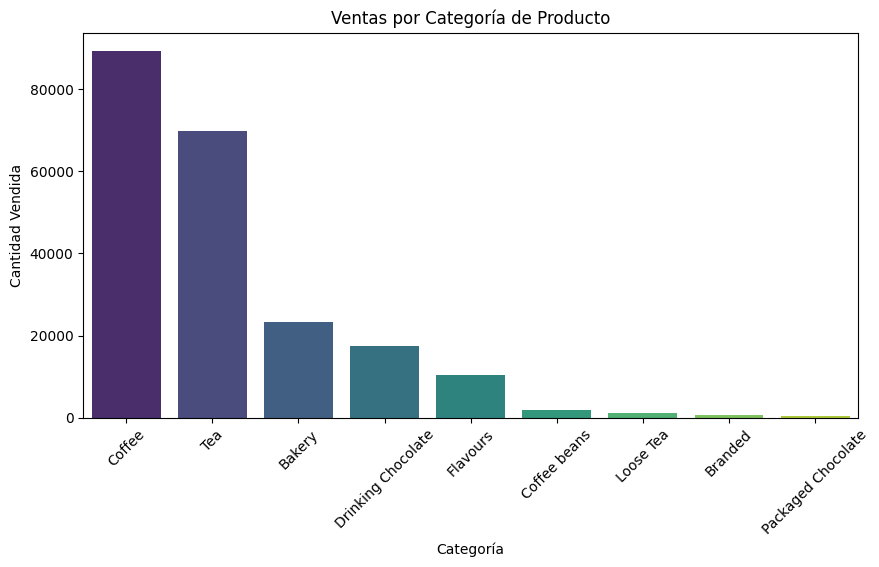

In [9]:
# Agrupar por categor√≠a y sumar las cantidades vendidas
category_sales = df.groupby("product_category")["transaction_qty"].sum().reset_index()

# Ordenar de mayor a menor
category_sales = category_sales.sort_values(by="transaction_qty", ascending=False)

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(x="product_category", y="transaction_qty", data=category_sales, palette="viridis")
plt.xticks(rotation=45)
plt.title("Ventas por Categor√≠a de Producto")
plt.xlabel("Categor√≠a")
plt.ylabel("Cantidad Vendida")
plt.show()

Indiscutidamente los productos con mayor venta son el caf√© y el t√©, y luego con una cantidad menor vendida se encuentran los productos de pasteler√≠a. Ser√≠a recomendable analizar si es posible incrementar las ventas de productos de pasteler√≠a, que son un excelente complemento con el t√© y el caf√©.

### Ventas por sucursal

¬øCu√°l es la sucursal que vende m√°s?

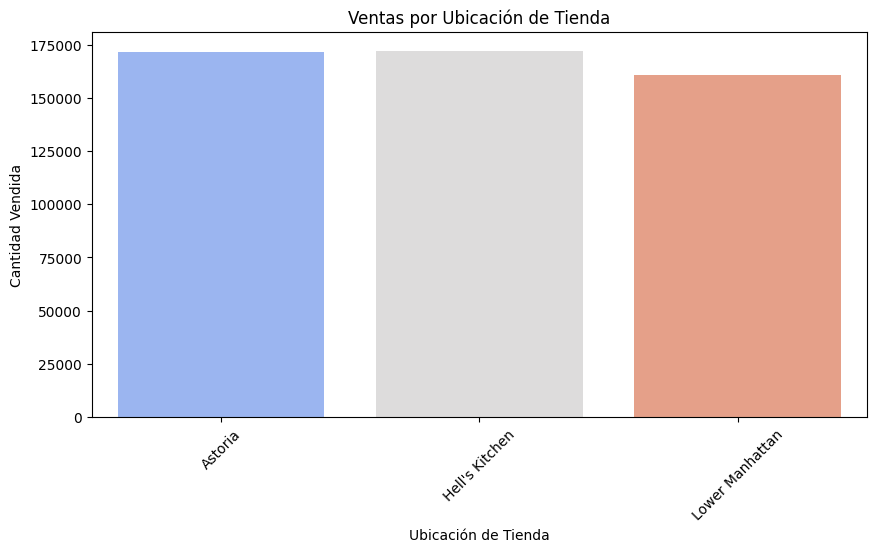

In [16]:
store_sales = df.groupby("store_location")["unit_price"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="store_location", y="unit_price", data=store_sales, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Ventas por Ubicaci√≥n de Tienda")
plt.xlabel("Ubicaci√≥n de Tienda")
plt.ylabel("Cantidad Vendida")
plt.show()



La cafeter√≠a cuenta con 3 sucursales dentro de la ciudad de Nueva York. Las tres sucursales tienen un nivel de venta similar cercano a los USD 175.000. Siendo Lower Manhattan la sucursal que tiene un desempe√±o mas bajo de las tres. Ser√≠a relevante conocer los motivos del desempe√±o mas bajo para al menos poder igualar los niveles de venta de las otras dos sucursales.

### Distribuci√≥n de precios

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


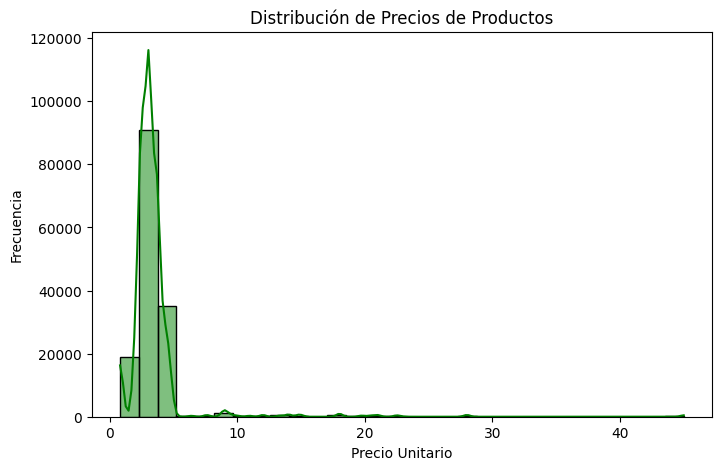

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["unit_price"], bins=30, kde=True, color="g")
plt.title("Distribuci√≥n de Precios de Productos")
plt.xlabel("Precio Unitario")
plt.ylabel("Frecuencia")
plt.show()

Se puede ver que la mayoria de las ventas son de productos con precios que se encuentran entre los 4 y los 6 dolares, con escasas ventas de algunos productos m√°s exclusivos de mas de USD 40.

### Relaci√≥n entre precio y cantidad vendida

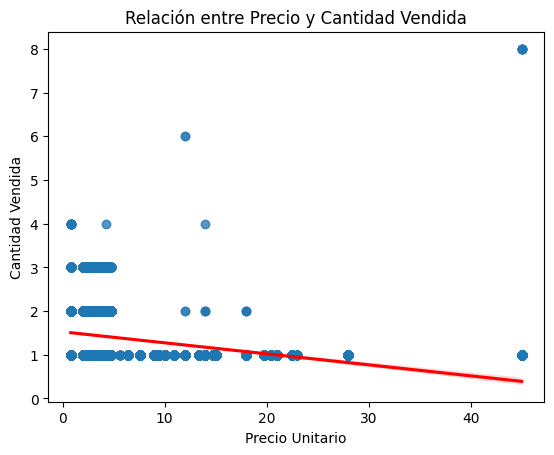

In [17]:
sns.regplot(x="unit_price", y="transaction_qty", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Relaci√≥n entre Precio y Cantidad Vendida")
plt.xlabel("Precio Unitario")
plt.ylabel("Cantidad Vendida")
plt.show()

Se observa una correlacion negativa entre el precio y la cantidad vendida.

### Ventas por a√±o

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


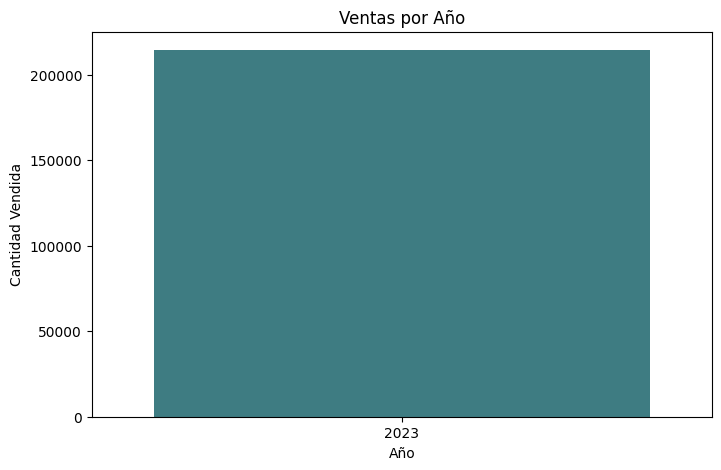

In [13]:
yearly_sales = df.groupby("year")["transaction_qty"].sum().reset_index()

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x="year", y="transaction_qty", data=yearly_sales, palette="crest")
plt.title("Ventas por A√±o")
plt.xlabel("A√±o")
plt.ylabel("Cantidad Vendida")
plt.show()

Solamente hay un a√±o para analizar

### Ventas por mes

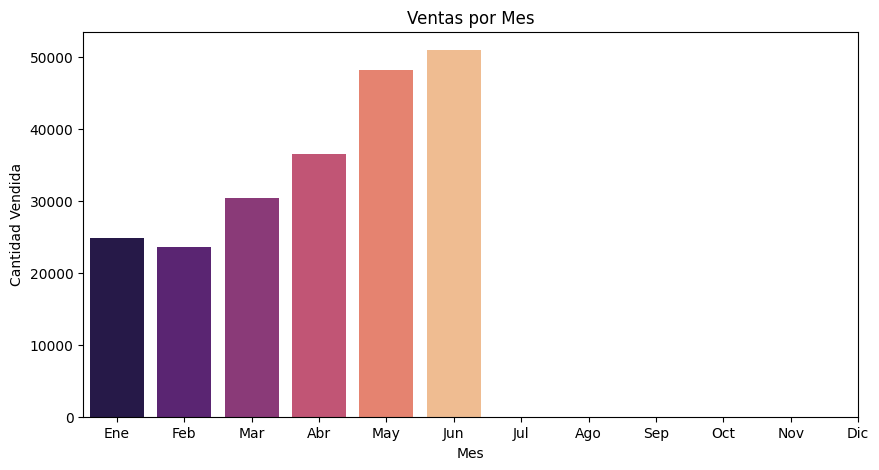

In [14]:
# Agrupar por mes
monthly_sales = df.groupby("month")["transaction_qty"].sum().reset_index()

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(x="month", y="transaction_qty", data=monthly_sales, palette="magma")

plt.xticks(range(12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.title("Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.show()

Solo hay datos de la operaci√≥n por seis meses, con un crecimiento sostenido en las ventas.

## 5 . Conclusiones: 

-  **Horas Pico y Gesti√≥n de Recursos**

üìå Insight: Se identificaron horarios de alta demanda, con un claro aumento en las transacciones durante las ma√±anas (7 AM - 10 AM) y otro pico menor en la tarde (3 PM - 5 PM).


‚úÖ Acci√≥n recomendada: Ajustar la asignaci√≥n de personal en estos horarios para mejorar la eficiencia del servicio y reducir tiempos de espera. Tambi√©n se pueden dise√±ar promociones espec√≠ficas para horas de baja demanda.

-  **Desempe√±o por Categor√≠a de Producto**

üìå Insight: Las bebidas de caf√© representan la mayor parte de las ventas, pero la categor√≠a Bakery (panader√≠a y pasteler√≠a) muestra un desempe√±o menor en comparaci√≥n con su potencial.

‚úÖ Acci√≥n recomendada: Evaluar estrategias para potenciar las ventas de productos de Bakery, como combos con caf√© o descuentos en compras combinadas.
Revisar la oferta actual y considerar incorporar productos m√°s alineados con las preferencias de los clientes.
Destacar estos productos en el men√∫ o en la exhibici√≥n en tienda para incentivar su compra impulsiva.

- **Comparaci√≥n entre Sucursales**

üìå Insight: Existen diferencias en las ventas entre las tres sucursales, con una tienda claramente bajo a las otras en volumen de transacciones.


‚úÖ Acci√≥n recomendada: Evaluar qu√© factores diferencian a la sucursal con mejor rendimiento (ubicaci√≥n, promociones, fidelizaci√≥n) y replicar estrategias en las otras tiendas.

-  **Relaci√≥n entre Precio y Cantidad Vendida**

üìå Insight: Se observ√≥ que ciertos productos con precios bajos e intermedios tienden a venderse m√°s que los muy caros.

‚úÖ Acci√≥n recomendada: Ajustar estrategias de pricing y evaluar si peque√±os descuentos o combos pueden incentivar la compra de productos con menor rotaci√≥n.

